In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

In [19]:
import os 

In [20]:
data = pd.read_csv('C:\\Users\\Naura Rania\\Desktop\\coba\\Gojek.csv')
data

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
...,...,...,...,...,...
224997,Sad Gamer,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0
224998,fadhil fadil,Yok lah,5,2021-12-11 12:28:20,4.0.0
224999,g sugiarto,Sempurna,5,2022-03-14 01:45:39,4.0.0
225000,J i H A D 'B E,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0


# 1. Data Understanding

In [21]:
data.dtypes

userName      object
content       object
score          int64
at            object
appVersion    object
dtype: object

In [22]:
data.shape

(225002, 5)

In [23]:
data = data.dropna()
data.isnull().sum()

userName      0
content       0
score         0
at            0
appVersion    0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data.describe()

,score
count,225000.000000
mean,3.928991
std,1.630557
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


# 2. Prepocessing Text

In [26]:
data.head()

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3


In [27]:
data = data.loc[0:50001]
data

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
...,...,...,...,...,...
49997,Aditia Amri,Saya rubah dulu ratingnya karena setiap kali s...,1,2023-04-04 22:12:41,4.64.2
49998,Titin Prihani,Suka dengan ketepatan waktu dan kondisi barang...,5,2023-04-04 11:29:16,4.64.2
49999,Susianti,rada kecewa sama pembaruan yg sekarang Saya bi...,2,2023-04-05 13:54:23,4.64.2
50000,Kep Kep,Semoga saling membantu,5,2023-04-04 22:43:45,4.64.2


In [28]:
data = data.drop(columns=['userName',"at","appVersion"],axis=1)
data.head()

,content,score
0,akun gopay saya di blok,1
1,Lambat sekali sekarang ini bosssku apk gojek g...,3
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4
3,Baru download gojek dan hape baru trus ditop u...,1
4,Mantap,5


In [29]:
data['content'].iloc[11]

'Makin lama gojek makin ngga jelas susah bgt dapet driver buat gofood ongkirnya juga mahal bgt Mohon diperbaiki'

In [30]:
data['content'] = data['content'].str.replace(r'\s+', ' ', regex=True).str.strip()
data['content'].iloc[4]

'Mantap'

In [31]:
# Normalisasi
norm = {"apk":"aplikasi","gk":"tidak","bgt":"banget","hape":"handphone","trus":"terus","sy":"saya","Tq":"terimakasih","blom":"belom", "plg":"paling", "j ":"juga", "ngaco":"sembarangan", "dgn":"dengan", "gue":"saya",  "kwalitas":"kualitas", "aing":"aku", "tehnologi":"teknologi", "duid":"uang", "jd":"jadi", "msih":"masih", "bgsd":"bangsat", "chas":"cas", "kendara":"kendaraan", "krg":"kurang", "dn":"dan", "udh":"udah", "mnrt":"menurut", "dl":"dulu", "sblm":"sebelum", "kyknya":"sepertinya", "tidak":"ngk"}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['content'] = data['content'].apply(lambda x: normalisasi(x))

In [32]:
data['content'].loc[0:50]

0                               akun gopay saya di blok
1     Lambat sekali sekarang ini bosssku aplikasi go...
2     Kenapa sih dari kemarin saya buka aplikasi goj...
3     Baru download gojek dan handphone baru terus d...
4                                                Mantap
5                                                 Bagus
6                                             Coba dulu
7                                                    Ok
8     Gimana ini kak pin saya salah terus padahal ud...
9     Biar aman kamu ngk bisa pakai gojek Jadi saya ...
10                               Kumpulan driver sampah
11    Makin lama gojek makin ngga jelas susah banget...
12                                            Ok mantap
13                                           Verry Good
14    Aplikasi asuuu makin lama main gx jelas Ais hr...
15    Misi dari gojek jago gak jelas sayaarat penyel...
16    Untuk sekarang aplikasi nya good job dan banya...
17                                              

In [33]:
import pandas as pd
import numpy as np
import joblib
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import os
import re

def wardrop(text):

    text = text.lower()

    url_pattern = re.compile(r'\b(?:https?|ftp|file):\/\/[-A-Z0-9+&@#\/%?=~_|!:,.;]*[-A-Z0-9+&@#\/%=~_|]|\bwww\.[-A-Z0-9+&@#\/%?=~_|!:,.;]*[-A-Z0-9+&@#\/%=~_|]', re.IGNORECASE)
    text = re.sub(url_pattern, '', text)

    html_tag_pattern = re.compile(r'<[^>]+>')
    text = re.sub(html_tag_pattern, '', text)

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\n', ' ', text)

    extra_spaces_pattern = re.compile(r'\s+')
    text = re.sub(extra_spaces_pattern, ' ', text)

    return text

def sastrawi(text):
    # Membuat instance dari StopWordRemover
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()

    # Menghapus stopword dari teks
    text = stopword_remover.remove(text)

    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Melakukan stemming pada teks
    text = stemmer.stem(text)

    return text

In [34]:
data['content'] = data['content'].apply(wardrop)

In [35]:
data['content'] = data['content'].apply(sastrawi)

KeyboardInterrupt: 

In [36]:
data.to_excel('gojek2.xlsx')

In [37]:
import pandas as pd
data = pd.read_excel('gojek2.xlsx')

In [38]:
data.isna().sum()

Unnamed: 0     0
content       19
score          0
dtype: int64

In [39]:
data.dropna(inplace=True)

In [40]:
# Untuk Score 5 dan 4 kita kategorikan sebagai nilai positif (1) dan untuk  3, 2, dan 1 dikategorikan sebagai negatif (0)

data['score'] = data['score'].replace({5 : 1 , 4 : 1,  3 : 0, 2 : 0, 1 : 0})
data

,Unnamed: 0,content,score
0,0,akun gopay saya di blok,0
1,1,lambat sekali sekarang ini bosssku aplikasi go...,0
2,2,kenapa sih dari kemarin saya buka aplikasi goj...,1
3,3,baru download gojek dan handphone baru terus d...,0
4,4,mantap,1
...,...,...,...
49997,49997,saya rubah dulu ratingnya karena setiap kali s...,0
49998,49998,suka dengan ketepatan waktu dan kondisi barang...,1
49999,49999,rada kecewa sama pembaruan yg sekarang saya bi...,0
50000,50000,semoga saling membantu,1


In [41]:
X = data['content']
y = data['score']

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Membuat objek ShuffleSplit
shufflesplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Loop melalui setiap split
for train_index, test_index in shufflesplit.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [43]:
X_test.shape

(9997,)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
train_documents = [
    "belajar mesin pembelajar saya suka",
    "menarik mesin pembelajar sangat",
]

test_documents = [
    "belajar mesin pembelajar saya"
]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training documents
tfidf_train = vectorizer.fit_transform(train_documents)

# Transform the test documents
tfidf_test = vectorizer.transform(test_documents)

# Function to display TF-IDF values
def display_tfidf(tfidf, documents):
    feature_names = vectorizer.get_feature_names_out()
    for doc_idx, doc in enumerate(documents):
        print(f"Dokumen {doc_idx + 1}:")
        for word_idx in tfidf[doc_idx].nonzero()[1]:
            print(f"Token: {feature_names[word_idx]}, TF-IDF: {tfidf[doc_idx, word_idx]}")
        print()

print("Hasil TF-IDF untuk data latih:")
display_tfidf(tfidf_train, train_documents)

print("\nHasil TF-IDF untuk data uji:")
display_tfidf(tfidf_test, test_documents)


Hasil TF-IDF untuk data latih:
Dokumen 1:
Token: suka, TF-IDF: 0.4992213265230509
Token: saya, TF-IDF: 0.4992213265230509
Token: pembelajar, TF-IDF: 0.35520008546852583
Token: mesin, TF-IDF: 0.35520008546852583
Token: belajar, TF-IDF: 0.4992213265230509

Dokumen 2:
Token: sangat, TF-IDF: 0.5761523551647353
Token: menarik, TF-IDF: 0.5761523551647353
Token: pembelajar, TF-IDF: 0.40993714596036396
Token: mesin, TF-IDF: 0.40993714596036396


Hasil TF-IDF untuk data uji:
Dokumen 1:
Token: saya, TF-IDF: 0.5761523551647353
Token: pembelajar, TF-IDF: 0.40993714596036396
Token: mesin, TF-IDF: 0.40993714596036396
Token: belajar, TF-IDF: 0.5761523551647353



In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Membuat objek TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Melakukan fitting dan transformasi pada data
X_vector_train = vectorizer.fit_transform(X_train)
X_vector_test = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()

# Mengubah hasil transformasi ke dalam bentuk array untuk visualisasi
X_vector_train_array = X_vector_train.toarray()
X_vector_test_array = X_vector_test.toarray()

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_vector_train, y_train) 


RandomForestClassifier()

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_vector_test)

accuracy_score(y_test, y_pred)

0.9028708612583776

In [48]:
from sklearn.metrics import classification_report

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3630
           1       0.95      0.90      0.92      6367

    accuracy                           0.90      9997
   macro avg       0.89      0.90      0.90      9997
weighted avg       0.91      0.90      0.90      9997



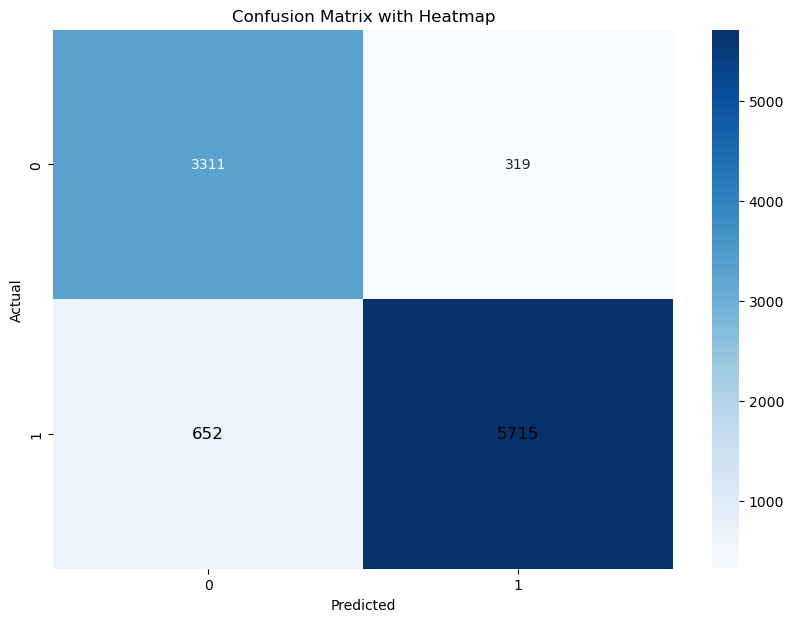

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai FN, FP, TP, dan TN
TN, FP, FN, TP = cm.ravel()

# Tampilkan confusion matrix dengan heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Tambahkan label untuk FN dan TP dengan warna putih
for i, j, val in [(1, 0, FN), (1, 1, TP)]:
    plt.text(j+0.5, i+0.5, f'{val}', ha='center', va='center', color='black', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Heatmap')
plt.show()

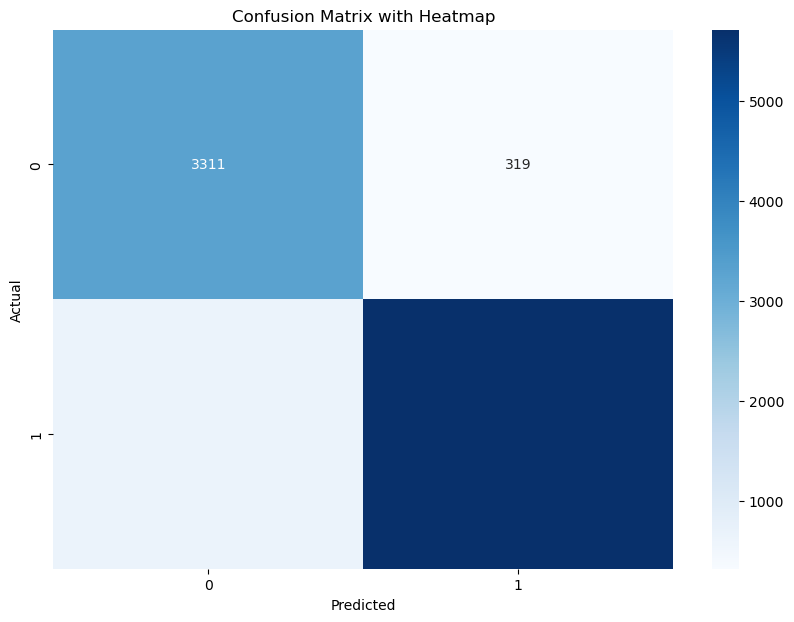

In [50]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Heatmap')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat model RandomForestClassifier
model = RandomForestClassifier()

# Menentukan parameter grid untuk pencarian
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih GridSearchCV
grid_search.fit(X_vector_train, y_train)

# Mencetak parameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Mencetak akurasi terbaik
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_vector_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model terbaik pada data pelatihan: {accuracy:.2f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [18]:
import joblib

# Save the model
joblib.dump(best_model, 'gojek_model.joblib')

['gojek_model.joblib']

In [19]:
joblib.dump(vectorizer, 'gojek_vectorizer.joblib')

['gojek_vectorizer.joblib']

In [3]:
import pandas as pd
import numpy as np
import joblib
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import os
import re

loaded_model = joblib.load('gojek_model.joblib')
loaded_vector = joblib.load('gojek_vectorizer.joblib')

def wardrop(text):

    text = text.lower()

    url_pattern = re.compile(r'\b(?:https?|ftp|file):\/\/[-A-Z0-9+&@#\/%?=~_|!:,.;]*[-A-Z0-9+&@#\/%=~_|]|\bwww\.[-A-Z0-9+&@#\/%?=~_|!:,.;]*[-A-Z0-9+&@#\/%=~_|]', re.IGNORECASE)
    text = re.sub(url_pattern, '', text)

    html_tag_pattern = re.compile(r'<[^>]+>')
    text = re.sub(html_tag_pattern, '', text)

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\n', ' ', text)

    extra_spaces_pattern = re.compile(r'\s+')
    text = re.sub(extra_spaces_pattern, ' ', text)

    return text

def sastrawi(text):
    # Membuat instance dari StopWordRemover
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()

    # Menghapus stopword dari teks
    text = stopword_remover.remove(text)

    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Melakukan stemming pada teks
    text = stemmer.stem(text)

    return text

def manual_testing(news):

    testing_news = {'text' : [news]}
    new_df_test = pd.DataFrame(testing_news)
    new_df_test['text'] = new_df_test['text'].apply(wardrop)
    new_df_test['text'] = new_df_test['text'].apply(sastrawi)
    new_x_test = new_df_test['text']
    new_xv_test = loaded_vector.transform(new_x_test)


    pred = loaded_model.predict(new_xv_test)
    if pred[0] == 1:
        pred = "sentimen positif"
    else :
        pred = "sentimen negatif"

    
    return pred

news = input(str(''))
hasil = manual_testing(news)

print(hasil)

sentimen positif
